In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [58]:
orig_train = pd.read_csv('train_dataset.csv')
orig_test = pd.read_csv('test_dataset.csv')

In [59]:
train.head()

id  store_sales(in millions)  unit_sales(in millions)  total_children  \
0   0                      8.61                      3.0             2.0   
1   1                      5.00                      2.0             4.0   
2   2                     14.08                      4.0             0.0   
3   3                      4.02                      3.0             5.0   
4   4                      2.13                      3.0             5.0   

   num_children_at_home  avg_cars_at home(approx).1  gross_weight  \
0                   2.0                         2.0         10.30   
1                   0.0                         3.0          6.66   
2                   0.0                         3.0         21.30   
3                   0.0                         0.0         14.80   
4                   0.0                         3.0         17.00   

   recyclable_package  low_fat  units_per_case  store_sqft  coffee_bar  \
0                 1.0      0.0            32.0     36509.0         0.0   
1                 1.0      0.0             1.0     28206.0         1.0   
2                 1.0      0.0            26.0     21215.0         1.0   
3                 0.0      1.0            36.0     21215.0         1.0   
4                 1.0      1.0            20.0     27694.0         1.0   

   video_store  salad_bar  prepared_food  florist    cost  
0          0.0        0.0            0.0      0.0   62.09  
1          0.0        0.0            0.0      0.0  121.80  
2          0.0        0.0            0.0      0.0   83.51  
3          0.0        0.0            0.0      0.0   66.78  
4          1.0        1.0            1.0      1.0  111.51

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

In [61]:
train.shape

(360336, 17)

In [62]:
train.describe()

id  store_sales(in millions)  unit_sales(in millions)  \
count  360336.000000             360336.000000            360336.000000   
mean   180167.500000                  6.337376                 3.043881   
std    104020.187637                  3.307980                 0.784676   
min         0.000000                  0.510000                 1.000000   
25%     90083.750000                  3.720000                 3.000000   
50%    180167.500000                  5.780000                 3.000000   
75%    270251.250000                  8.400000                 4.000000   
max    360335.000000                 22.920000                 6.000000   

       total_children  num_children_at_home  avg_cars_at home(approx).1  \
count   360336.000000         360336.000000               360336.000000   
mean         2.456482              0.689390                    2.203813   
std          1.488992              1.214732                    1.084293   
min          0.000000              0.000000                    0.000000   
25%          1.000000              0.000000                    1.000000   
50%          2.000000              0.000000                    2.000000   
75%          4.000000              1.000000                    3.000000   
max          5.000000              5.000000                    4.000000   

        gross_weight  recyclable_package        low_fat  units_per_case  \
count  360336.000000       360336.000000  360336.000000   360336.000000   
mean       13.822071            0.568086       0.327797       18.972706   
std         4.614792            0.495343       0.469411       10.212912   
min         6.000000            0.000000       0.000000        1.000000   
25%         9.710000            0.000000       0.000000       10.000000   
50%        13.600000            1.000000       0.000000       20.000000   
75%        17.700000            1.000000       1.000000       28.000000   
max        21.900000            1.000000       1.000000       36.000000   

          store_sqft     coffee_bar    video_store      salad_bar  \
count  360336.000000  360336.000000  360336.000000  360336.000000   
mean    28180.333442       0.564839       0.277394       0.504807   
std      5968.874074       0.495779       0.447713       0.499978   
min     20319.000000       0.000000       0.000000       0.000000   
25%     23593.000000       0.000000       0.000000       0.000000   
50%     27694.000000       1.000000       0.000000       1.000000   
75%     33858.000000       1.000000       1.000000       1.000000   
max     39696.000000       1.000000       1.000000       1.000000   

       prepared_food        florist           cost  
count  360336.000000  360336.000000  360336.000000  
mean        0.504832       0.503191      99.614729  
std         0.499977       0.499991      29.939435  
min         0.000000       0.000000      50.790000  
25%         0.000000       0.000000      70.320000  
50%         1.000000       1.000000      98.810000  
75%         1.000000       1.000000     126.620000  
max         1.000000       1.000000     149.750000

In [63]:
train.drop('id', axis = 1, inplace = True)
test_ = test.drop('id', axis = 1)

In [64]:
def heatmap(df, label = None):
    corr = df.corr()
    plt.figure(figsize=(15,12))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, linewidths=.5, cmap = 'crest', cbar = True, annot = True)
    plt.title(f'{label} Dataset Correlation Matrix', fontsize = 20, weight = 'bold')
    plt.show()

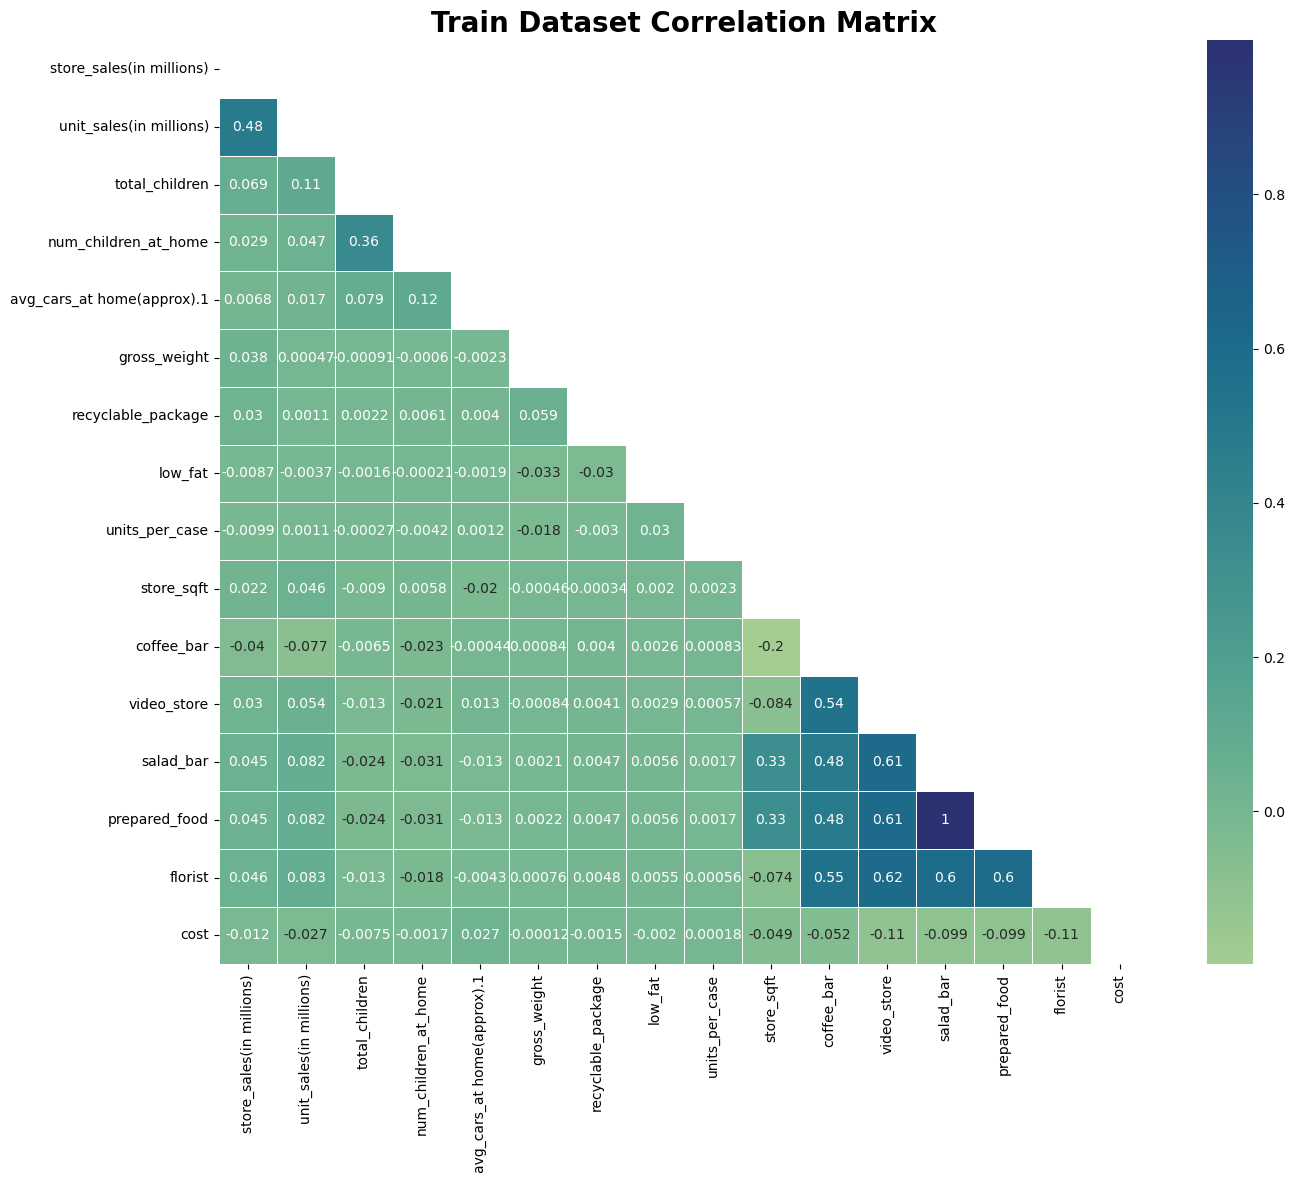

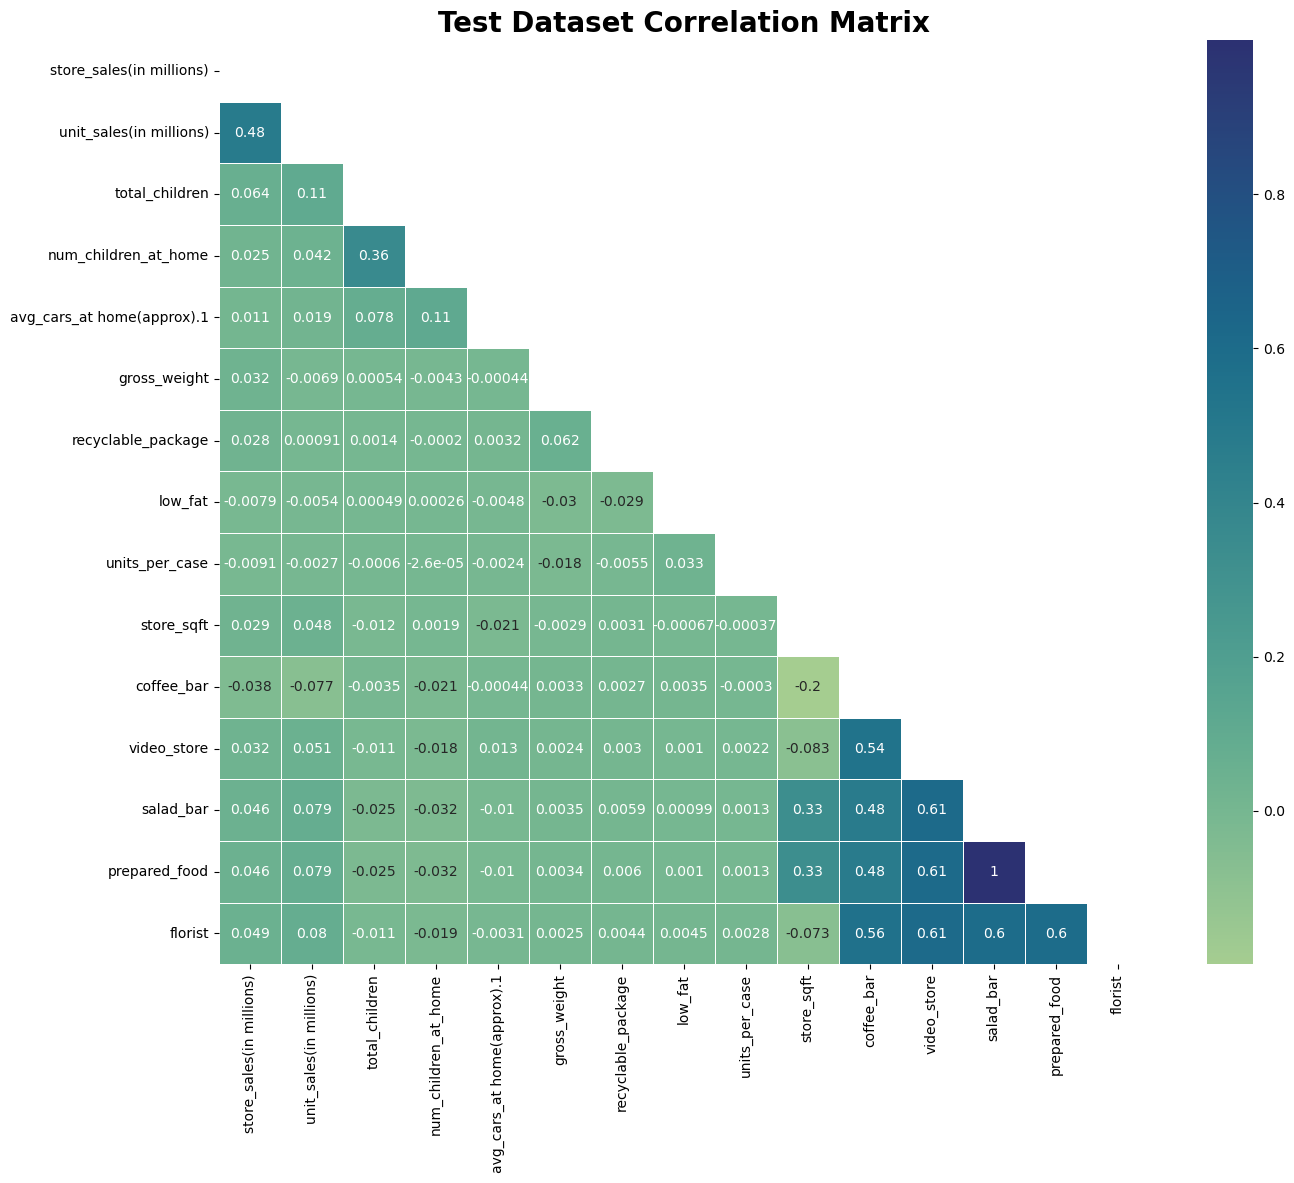

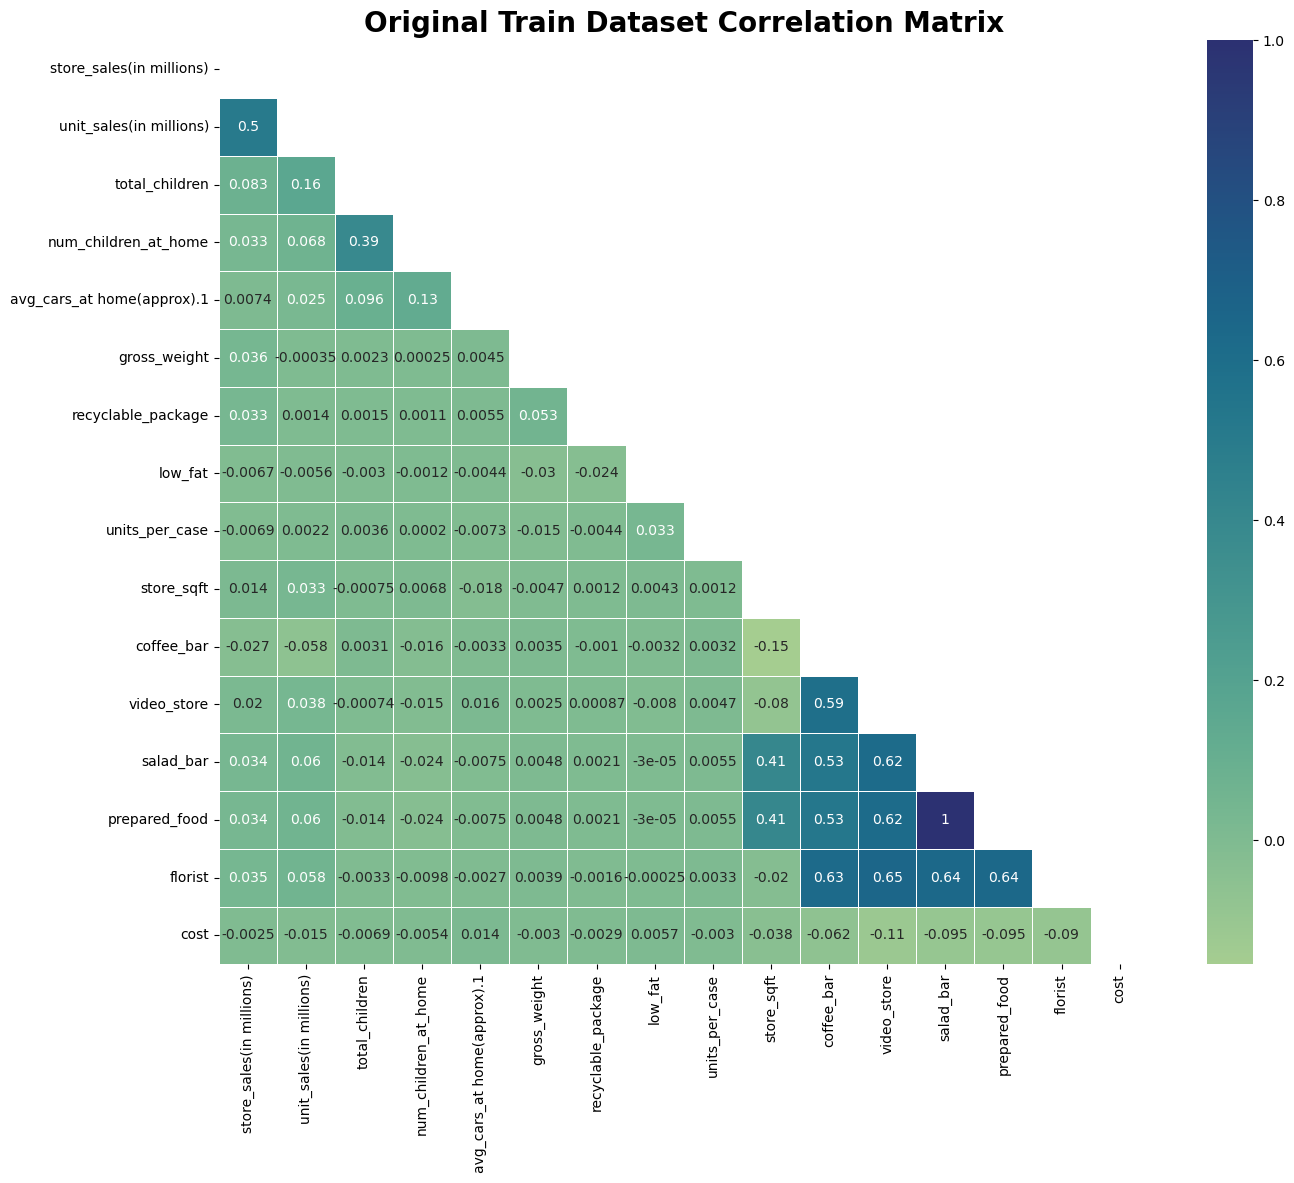

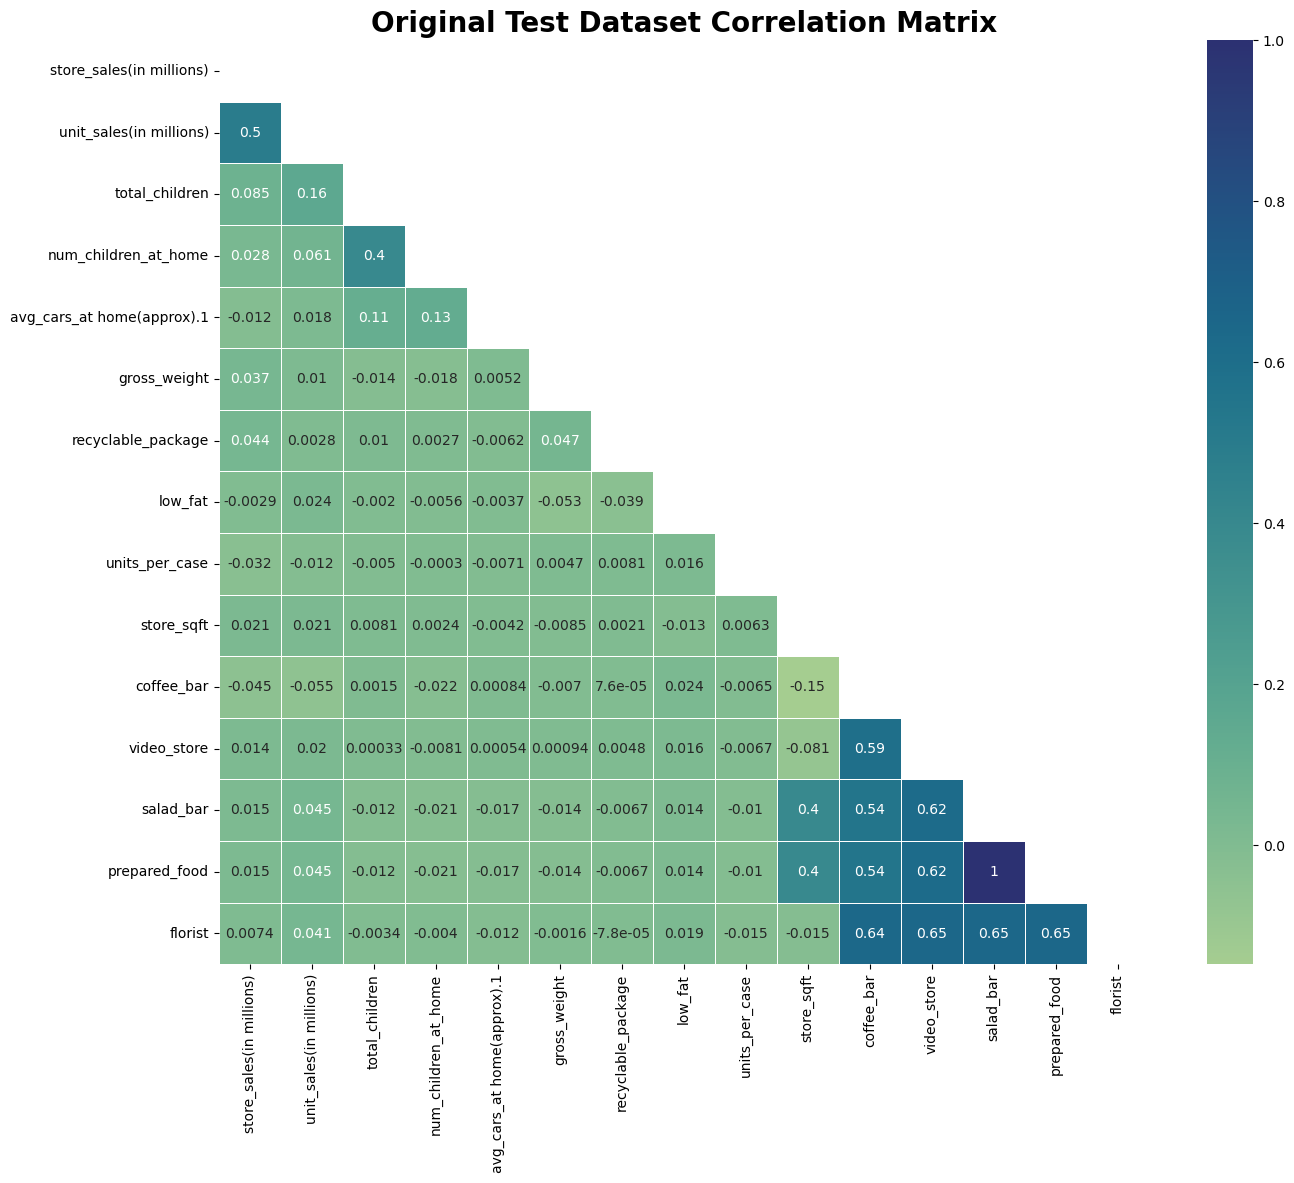

In [65]:
heatmap(train, label = 'Train')
heatmap(test_, label = 'Test')
heatmap(orig_train, label = 'Original Train')
heatmap(orig_test, label = 'Original Test')

In [66]:
train = pd.concat([train, orig_train], axis = 0)
train.drop('prepared_food', axis = 1, inplace = True)
test_.drop('prepared_food', axis = 1, inplace = True)

In [67]:
train['child_ratio'] = train.eval('total_children/num_children_at_home')
train.replace([np.inf, -np.inf], 10, inplace = True)
train.fillna(0, inplace = True)
test_['child_ratio'] = test_.eval('total_children / num_children_at_home')
test_.replace([np.inf, -np.inf], 10, inplace = True)
test_.fillna(0, inplace = True)

In [68]:
X = train.copy()
y = X.pop('cost')

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold

min_val_error = float("inf")
higher_error = 0

kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    gbr = GradientBoostingRegressor(max_depth=6, n_estimators = 500, learning_rate = 0.2, warm_start = True)
    gbr.fit(X_train, np.log1p(y_train))
    y_pred = np.expm1(gbr.predict(X_val))
    val_error = mean_squared_log_error(y_val, y_pred, squared = False)
    print(f'rmsle: {val_error}')
    if val_error < min_val_error:
        min_val_error = val_error
        higher_error = 0
    else:
        higher_error += 1
        min_val_error = val_error
        if higher_error == 3:
            break
        min_val_error = val_error

rmsle: 0.2989202414822787
rmsle: 0.2983743414654847
rmsle: 0.2992647717056092
rmsle: 0.2978421357222306
rmsle: 0.2973268490748175
rmsle: 0.29944084204130134
rmsle: 0.29940660486616283
rmsle: 0.29825122106668495
rmsle: 0.29823335209911084
rmsle: 0.3005799473412597


In [69]:
test1 = test.drop(columns = test.columns[1:], axis = 1)
preds = np.expm1(gbr.predict(test_))
sub = pd.DataFrame(preds, index=test1['id'], columns=['cost'])
sub.to_csv('submission.csv')